# Amazon's Reviews Analysis

## Data Collection

### Reviews Collection

Import the required libraries

In [1]:
import requests 
import pandas as pd 
from bs4 import BeautifulSoup

In [6]:
url = 'https://www.amazon.it/Philips-hd2581-00-Tostapane-nero/product-reviews/B01N9XBDTI/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1'


In [7]:
def get_soup(url):

    result = requests.get(url)
    content = result.text
    soup = BeautifulSoup(content, 'lxml')
    
    return soup 

In [8]:
reviewlist = []

In [9]:
# does not consider other languages reviews

def get_reviews(soup):
    #print(soup.title.text)
    reviews = soup.find_all('div', {'data-hook': 'review'}) # returns a list
    #print(soup.title.text) 
    try:
        for item in reviews:    
            review = {
            'product' : soup.title.text.replace('Amazon.it:Recensioni clienti:', '') ,
            'title' : item.find('a', {'data-hook': 'review-title'}).text.strip(),
            #rating = item.find('i', {'data-hook': 'review-star-rating-view-point'})
            'rating' : float(item.find('span', {'class': 'a-icon-alt'}).text.replace('su 5 stelle', '').replace(',', '.').strip()),
            'data' : item.find('span', {'class' : 'a-size-base'}).text.replace('Recensito in Italia il ', '').strip(),
            'body' : item.find('span', {'data-hook' : 'review-body'}).text.strip(),  #still to remove some data
            }
            
            reviewlist.append(review)
    except:
        pass

In [10]:
for x in range(1,10): # should be 999 but it is better to not go that further.
    soup = get_soup(f'https://www.amazon.it/Philips-hd2581-00-Tostapane-nero/product-reviews/B01N9XBDTI/ref=cm_cr_getr_d_paging_btm_next_348?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

In [11]:
reviewlist

[{'body': 'Il tostapane si comporta come deve. Le fette vengono tostate in maniera uniforme. Comodo con il tastino dello stop se singole interrompere prima la tostatura. Unico neo a mio avviso la mancanza di una spia e sarebbe stato più visibile una manopola con un indicatore di posizione colorato per una visualizzazione migliore. Per il resto ottimo acquisto a prezzo contenuto. Amazon al solito perfetta.',
  'data': '12 agosto 2019',
  'product': ' Philips Daily Collection \u200eHD2581/90 Tostapane con 8 Impostazioni e Griglia Scaldabriosche Integrata, Nero',
  'rating': 4.0,
  'title': 'Soddisfatto!'},
 {'body': 'Nel complesso funziona bene ma fare toast è impossibile non li lancia fuori almeno che non si faccia con 1 fetta di prosciutto ed una fetta di 1 mm di spessore di formaggio.Va bene per le singole fette.Altrimenti consiglio quello con le pinze.',
  'data': '8 dicembre 2021',
  'product': ' Philips Daily Collection \u200eHD2581/90 Tostapane con 8 Impostazioni e Griglia Scaldab

Create the dataframe

In [12]:
df = pd.DataFrame(reviewlist)

In [13]:
df

,product,title,rating,data,body
0,Philips Daily Collection ‎HD2581/90 Tostapane...,Soddisfatto!,4.0,12 agosto 2019,Il tostapane si comporta come deve. Le fette v...
1,Philips Daily Collection ‎HD2581/90 Tostapane...,Bello ma non da toast!,3.0,8 dicembre 2021,Nel complesso funziona bene ma fare toast è im...
2,Philips Daily Collection ‎HD2581/90 Tostapane...,Meraviglioso,5.0,7 febbraio 2022,"Non avevo mai avuto un tostapane, è la svolta,..."
3,Philips Daily Collection ‎HD2581/90 Tostapane...,Ottimo rapporto qualità/prezzo,5.0,26 gennaio 2022,Funziona molto bene per tostare fette di pane ...
4,Philips Daily Collection ‎HD2581/90 Tostapane...,Mai più senza,5.0,12 ottobre 2021,Prodotto conforme alla descrizione.Spedizione ...
5,Philips Daily Collection ‎HD2581/90 Tostapane...,Perfetto,5.0,28 dicembre 2021,Tostapane eccellente. 8 livelli di potenza. Sc...
6,Philips Daily Collection ‎HD2581/90 Tostapane...,Fa il suo dovere,4.0,15 giugno 2020,Buon prodotto. Costo superiore alle altre marc...
7,Philips Daily Collection ‎HD2581/90 Tostapane...,Bello,5.0,29 dicembre 2021,"Mi ci trovo bene, ha anche la funzione per ris..."
8,Philips Daily Collection ‎HD2581/90 Tostapane...,Buona qualità prezzo ma non comodo da pulire,3.0,12 ottobre 2021,Non facile da pulire nonostante il serbatoio d...
9,Philips Daily Collection ‎HD2581/90 Tostapane...,Molto pratico,4.0,30 giugno 2021,Sicuramente molto pratico sia per tostare le f...


## Amazon Product Reviews Sentiment Analysis with Python
In this notebook will be exploted three different approaches to perform sentiment analysis on Amazon reviews.

* Firstly, will be conducted an analysis aimed to understand which is the feeling that occurs more frequently from the customers' reviews.
* Secondly, will be performed a Logistic regression classification aimed to detect from the reviews if the customers are satisfied or not
* Thirdly, will be created a world cloud plot both for positive reviews and negatives ones. This kind of plot is useful to make a qualitative analysis on the most occuring words used in the reviews.

### 1st Approach

In [26]:
! pip install nltk

In [27]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


#### Preliminary data exploration

In [29]:
sentiments = SentimentIntensityAnalyzer()

In [30]:
data = df

In [31]:
data.head()

,product,title,rating,data,body
0,Philips Daily Collection ‎HD2581/90 Tostapane...,Soddisfatto!,4.0,12 agosto 2019,Il tostapane si comporta come deve. Le fette v...
1,Philips Daily Collection ‎HD2581/90 Tostapane...,Bello ma non da toast!,3.0,8 dicembre 2021,Nel complesso funziona bene ma fare toast è im...
2,Philips Daily Collection ‎HD2581/90 Tostapane...,Meraviglioso,5.0,7 febbraio 2022,"Non avevo mai avuto un tostapane, è la svolta,..."
3,Philips Daily Collection ‎HD2581/90 Tostapane...,Ottimo rapporto qualità/prezzo,5.0,26 gennaio 2022,Funziona molto bene per tostare fette di pane ...
4,Philips Daily Collection ‎HD2581/90 Tostapane...,Mai più senza,5.0,12 ottobre 2021,Prodotto conforme alla descrizione.Spedizione ...


In [32]:
print(data.describe())

          rating
count  30.000000
mean    4.200000
std     1.214851
min     1.000000
25%     4.000000
50%     5.000000
75%     5.000000
max     5.000000


In [33]:
# This is not the case but it is always a good practice to check for nas and drop them
data.dropna(inplace = True)

The Score column of this dataset contains the ratings that customers have given to the product based on their experience with the product. So let’s take a look at the rating breakdown to see how most customers rate the products they buy from Amazon:

In [34]:
ratings = data['rating'].value_counts()

In [35]:
ratings

5.0    18
4.0     5
3.0     4
1.0     2
2.0     1
Name: rating, dtype: int64

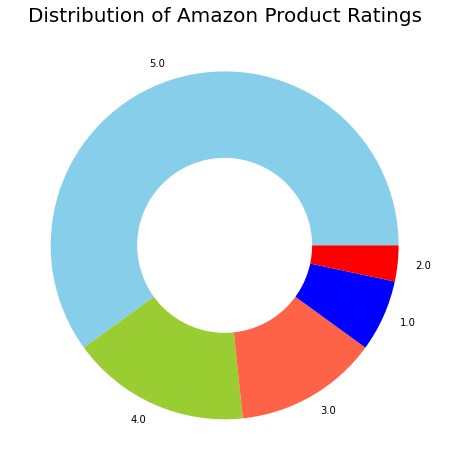

In [36]:
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
#central_circle = plt.Circle((0, 0), 0.5, color='black')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
title_obj = plt.title("Distribution of Amazon Product Ratings", fontsize=20)
#plt.setp(title_obj, color='white')
plt.show()

#### Sentiment analysis

According to the figure above, more than half of people rated products they bought from Amazon with 5 stars, which is good. Now, I’m going to add three more columns to this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the customer reviews mentioned in the Text column of the dataset:

In [37]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["body"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["body"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["body"]]
print(data.head())

                                             product  \
0   Philips Daily Collection ‎HD2581/90 Tostapane...   
1   Philips Daily Collection ‎HD2581/90 Tostapane...   
2   Philips Daily Collection ‎HD2581/90 Tostapane...   
3   Philips Daily Collection ‎HD2581/90 Tostapane...   
4   Philips Daily Collection ‎HD2581/90 Tostapane...   

                            title  rating             data  \
0                    Soddisfatto!     4.0   12 agosto 2019   
1          Bello ma non da toast!     3.0  8 dicembre 2021   
2                    Meraviglioso     5.0  7 febbraio 2022   
3  Ottimo rapporto qualità/prezzo     5.0  26 gennaio 2022   
4                   Mai più senza     5.0  12 ottobre 2021   

                                                body  Positive  Negative  \
0  Il tostapane si comporta come deve. Le fette v...     0.027     0.035   
1  Nel complesso funziona bene ma fare toast è im...     0.000     0.000   
2  Non avevo mai avuto un tostapane, è la svolta,...     0.000

Now let’s see how most people rated the products they bought from Amazon:

In [38]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


So, most people are neutral when submitting their experiences with the products they have purchased from Amazon. Now let’s see the total of all sentiment scores:

In [39]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  0.328
Negative:  0.353
Neutral:  29.319


Almost any review is classified as neutral.
From a bussines pov, this is not very useful becasue it is difficult to understand if people really like the product or not. However, this result can also be interpreted differently. A toaster is typically a cheap product, it is used quite frequently in the daily life and it satisfies a quite easy task (tosting bread). Thus, it is possible to hypothesize that even the nature of the product affects the results. A toaster is not that exciting. On the other hand, books' reviews are extremely personal and they allow to customers to express easily and better their 'feeling' while writing their reviews.

### 2nd Approach

In this second analysis a different approach will be used: classify bad and good reviews.
Ratings typically go from 1 to 5. Hence, 3 is a middle value value which can be considered neither good nor bad. Just average. So, aveerage reviews can be dropped out.

In [40]:
data = df

In [41]:
data = data[data['rating'] != 3]

Now it is possible to assign a label (a class) to each observation according to the rating. Positive sentiments will be denoted as 1 and negative as 0.

In [42]:
def sentiment(n):
    return 1 if n >= 4 else 0

In [43]:
data['sentiment'] = data['rating'].apply(sentiment)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
data.head()

,product,title,rating,data,body,Positive,Negative,Neutral,sentiment
0,Philips Daily Collection ‎HD2581/90 Tostapane...,Soddisfatto!,4.0,12 agosto 2019,Il tostapane si comporta come deve. Le fette v...,0.027,0.035,0.938,1
2,Philips Daily Collection ‎HD2581/90 Tostapane...,Meraviglioso,5.0,7 febbraio 2022,"Non avevo mai avuto un tostapane, è la svolta,...",0.000,0.000,1.000,1
3,Philips Daily Collection ‎HD2581/90 Tostapane...,Ottimo rapporto qualità/prezzo,5.0,26 gennaio 2022,Funziona molto bene per tostare fette di pane ...,0.000,0.000,1.000,1
4,Philips Daily Collection ‎HD2581/90 Tostapane...,Mai più senza,5.0,12 ottobre 2021,Prodotto conforme alla descrizione.Spedizione ...,0.000,0.000,1.000,1
5,Philips Daily Collection ‎HD2581/90 Tostapane...,Perfetto,5.0,28 dicembre 2021,Tostapane eccellente. 8 livelli di potenza. Sc...,0.085,0.000,0.915,1


#### Train the sentiment classifier

In [45]:
X = data['body']
y = data['sentiment']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

CountVectorizer develops a vector of all the words in the string. Import 
<br>
CountVectorizer and fit both training, testing data into it.



In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

Now, Logistic Regression will be used as a binary classifier to fit the training data in the model.

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(ctmTr, y_train)

LogisticRegression()

In [50]:
y_pred_class = model.predict(X_test_dtm)

In [51]:
y_pred_class

array([1, 1, 1, 1, 1, 1, 1])

In [52]:
accuracy_score(y_test, y_pred_class)

0.7142857142857143

### 3rd Approach

In [53]:
! pip install stop-words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=205bece3f7bdbb9e99649c233363d5a2602c07a97a93f1ad620fc7608d7e467d
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [54]:
! pip install plotly

In [56]:
import plotly.express as px 
import nltk 
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import plotly.graph_objects as go

In [57]:
data = df 

In [58]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

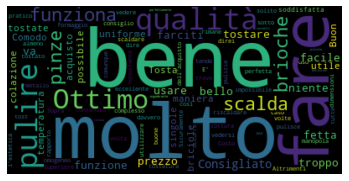

In [59]:
stop_words = stopwords.words('italian')

for parola in ["fette", "pane","tostapane","toast", "prodotto", "quindi", "c'è", "solo", "fa", "può"]:
  stop_words.append(parola)

textt = " ".join(review for review in data.body)
wordcloud = WordCloud(stopwords=stop_words).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [60]:
data = data[data['rating'] != 3]
data['sentiment'] = data['rating'].apply(lambda rating : +1 if rating > 3 else -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
# split df - positive and negative sentiment:
positive = data[data['sentiment'] == 1]
negative = data[data['sentiment'] == -1]

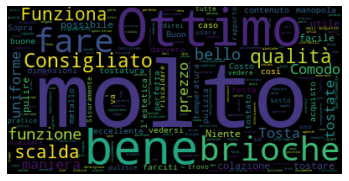

In [62]:
stopwords = stop_words
#stopwords.update(["br", "href","good","great"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.body)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

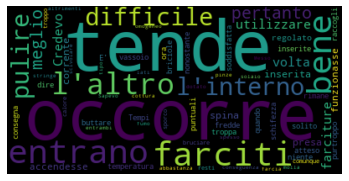

In [63]:
neg = " ".join(review for review in negative.body)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()